<a href="https://colab.research.google.com/github/Suvanga/-Stable-Roomate/blob/main/Workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

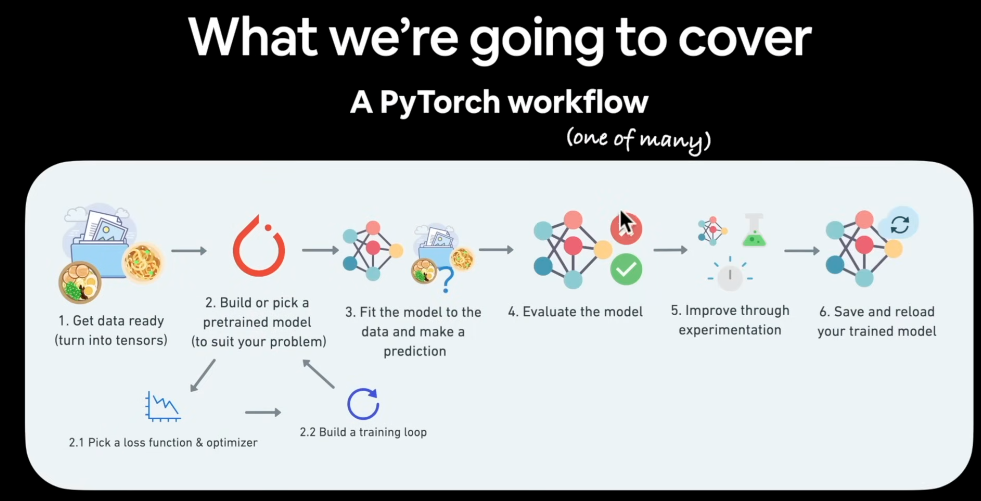


In [ ]:
Things_to_cover = {1:"data(prepare and load)",
                   2: "build a model",
                   3: "fitting the model to the data which is called training",
                   4: "making predictions and evaluating a model( inference )",
                   5: "saving and learning a model",
                   6: "Putting it all at one place together"}
Things_to_cover


{1: 'data(prepare and load)',
 2: 'build a model',
 3: 'fitting the model to the data which is called training',
 4: 'making predictions and evaluating a model( inference )',
 5: 'saving and learning a model',
 6: 'Putting it all at one place together'}

In [ ]:
import torch
from torch import nn #nn contains all of the pytorch building blocks
import matplotlib.pyplot as plt


##Preparing and Loading
* Data can be almost anything in machine  learning could be
  * Excel
  * Spreadsheer,
  * Images of any kind,
  * youtube has a lots of data
  * Audio
  * Patents of DNA is being used LOL
  * Text

## this has 2 parts
1. Get data into a numerical representaion
2. Buuild a model to represebt a patterns in that numerical representation


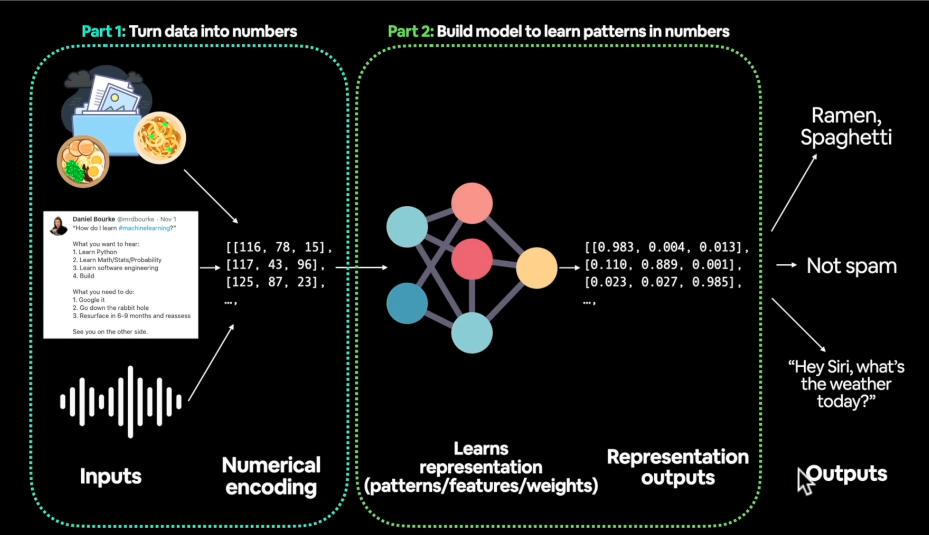

In [ ]:
#Create a *Known* parameters here is the formula Y = a +bx
weight = 0.7 ## that is our weight b
bias = 0.3  ## bias will be a

#create
start =0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim =1)
y = weight*X+ bias

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

###Splitting data into train and test steps

* Possibly the most important material in the machine learning

In [ ]:
#Create a train test split
train_split = int(0.8*len(X))
train_split

train_X, train_y = X[:train_split], y[:train_split]
test_X, test_y = X[train_split:], y[train_split:]

In [ ]:
def plot_predictions(train_data = train_X,
                     train_labels =train_y,
                     test_data = test_X,
                     test_labels = test_y,
                     predictions=None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c="b",s=4, label = "Training Data")

  #plot tresting fdata with green
  plt.scatter(test_data, test_labels, c="g", s= 4, label = "Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

  plt.legend(prop = {"size":14});

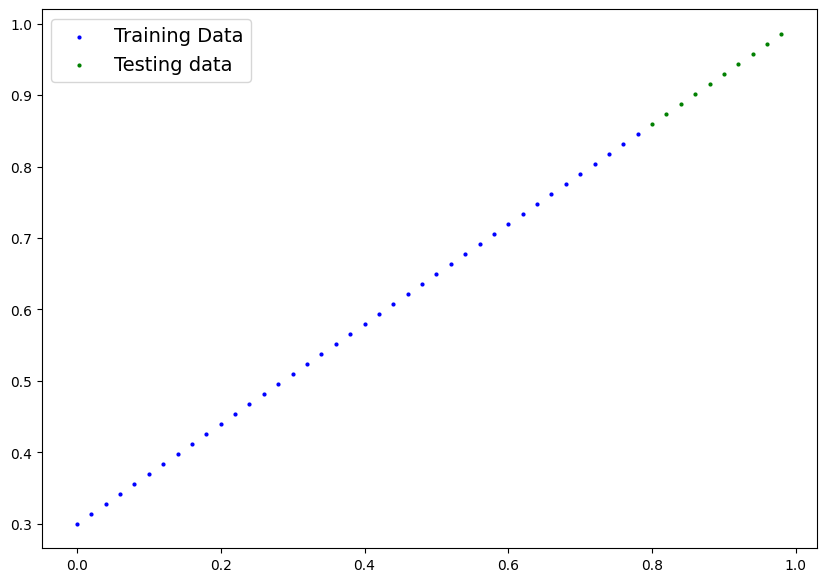

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1,
                                           requires_grad=True,
                                           dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    #Forward method to define the computation in the model
    def forward(self, x: torch.Tensor):
      return self.weights * x + self.bias